In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df=pd.read_csv("dataset.csv")

In [96]:
df

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2024 Mercedes-Benz Sprinter 2500 Standard Roof,2024 Mercedes-Benz Sprinter 2500 Cargo 144 WB ...,Mercedes-Benz,Sprinter 2500,2024,59037.0,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,9-Speed Automatic,Standard Roof,Cargo Van,3.0,Arctic White,Black,Rear-wheel Drive
998,2024 Dodge Hornet Hornet R/T Plus Eawd,Dealer Comments +++ Price Ends 5/31/2024 +++ A...,Dodge,Hornet,2024,49720.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,0.0,6-Spd Aisin F21-250 PHEV Auto Trans,Hornet R/T Plus Eawd,SUV,4.0,Acapulco Gold,Black,All-wheel Drive
999,2024 Jeep Wagoneer Base,\n \n The ALL New Friendship CDJR ...,Jeep,Wagoneer,2024,69085.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,20.0,8-Speed Automatic,Base,SUV,4.0,Diamond Black,Black,Four-wheel Drive
1000,2024 Nissan Murano SV Intelligent AWD,"\n \n CVT with Xtronic, AWD.At Tod...",Nissan,Murano,2024,43495.0,"6 DOHC, variable valve control, regular unlead...",6.0,Gasoline,6.0,Automatic,SV Intelligent AWD,SUV,4.0,Pearl White Tricoat,Graphite,All-wheel Drive


In [4]:
df.shape

(1002, 17)

# Data Preprocessing

In [5]:
df.isnull().sum()

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [20]:
df["trim"].value_counts()

trim
Limited                                 55
Base                                    46
Pursuit                                 33
Latitude                                28
Tradesman                               25
                                        ..
T8 Plus Dark Theme                       1
sDrive30i                                1
Tradesman Regular Cab 4x4 8&#39; Box     1
Twin Ultimate                            1
SV Intelligent AWD                       1
Name: count, Length: 165, dtype: int64

In [97]:
df=df.drop(columns=['name','model',])

In [98]:
df=df.dropna()

In [99]:
df.shape

(750, 15)

In [100]:
df.columns

Index(['description', 'make', 'year', 'price', 'engine', 'cylinders', 'fuel',
       'mileage', 'transmission', 'trim', 'body', 'doors', 'exterior_color',
       'interior_color', 'drivetrain'],
      dtype='object')

In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 0 to 1001
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   description     750 non-null    object 
 1   make            750 non-null    object 
 2   year            750 non-null    int64  
 3   price           750 non-null    float64
 4   engine          750 non-null    object 
 5   cylinders       750 non-null    float64
 6   fuel            750 non-null    object 
 7   mileage         750 non-null    float64
 8   transmission    750 non-null    object 
 9   trim            750 non-null    object 
 10  body            750 non-null    object 
 11  doors           750 non-null    float64
 12  exterior_color  750 non-null    object 
 13  interior_color  750 non-null    object 
 14  drivetrain      750 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 93.8+ KB


In [15]:
le=LabelEncoder()

In [102]:
unique_classes = df['make'].unique()
label_mapping = {label: idx + 1 for idx, label in enumerate(unique_classes)}

In [104]:
df['make']=df["make"].map(label_mapping)

In [105]:
unique_classes = df['engine'].unique()
label_mapping = {label: idx + 1 for idx, label in enumerate(unique_classes)}

In [106]:
df['engine']=df['engine'].map(label_mapping)

In [107]:
unique_classes = df['fuel'].unique()
label_mapping = {label: idx + 1 for idx, label in enumerate(unique_classes)}

In [108]:
df['fuel']=df['fuel'].map(label_mapping)

In [109]:
unique_classes = df['transmission'].unique()
label_mapping = {label: idx + 1 for idx, label in enumerate(unique_classes)}

In [110]:
df['transmission']=df['transmission'].map(label_mapping)

In [111]:
unique_classes = df['trim'].unique()
label_mapping = {label: idx + 1 for idx, label in enumerate(unique_classes)}

In [112]:
df['trim']=df['trim'].map(label_mapping)

In [113]:
unique_classes = df['body'].unique()
label_mapping = {label: idx + 1 for idx, label in enumerate(unique_classes)}

In [114]:
df['body']=df['body'].map(label_mapping)

In [115]:
unique_classes = df['exterior_color'].unique()
label_mapping = {label: idx + 1 for idx, label in enumerate(unique_classes)}

In [116]:
df['exterior_color']=df['exterior_color'].map(label_mapping)

In [117]:
unique_classes = df['interior_color'].unique()
label_mapping = {label: idx + 1 for idx, label in enumerate(unique_classes)}

In [118]:
df['interior_color']=df['interior_color'].map(label_mapping)

In [119]:
unique_classes = df['drivetrain'].unique()
label_mapping = {label: idx + 1 for idx, label in enumerate(unique_classes)}

In [120]:
df['drivetrain']=df['drivetrain'].map(label_mapping)

In [122]:
df=df.drop(columns=['description'])

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 0 to 1001
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   make            750 non-null    int64  
 1   year            750 non-null    int64  
 2   price           750 non-null    float64
 3   engine          750 non-null    int64  
 4   cylinders       750 non-null    float64
 5   fuel            750 non-null    int64  
 6   mileage         750 non-null    float64
 7   transmission    750 non-null    int64  
 8   trim            750 non-null    int64  
 9   body            750 non-null    int64  
 10  doors           750 non-null    float64
 11  exterior_color  750 non-null    int64  
 12  interior_color  750 non-null    int64  
 13  drivetrain      750 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 87.9 KB


In [124]:
df.head(5)

,make,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,1,2024,74600.0,1,6.0,1,10.0,1,1,1,4.0,1,1,1
1,1,2024,50170.0,2,6.0,1,1.0,1,2,1,4.0,2,1,1
3,2,2023,46835.0,3,8.0,1,32.0,1,3,1,4.0,3,2,2
4,3,2024,81663.0,4,6.0,2,10.0,2,4,2,4.0,4,2,1
5,4,2024,46000.0,5,6.0,1,3838.0,3,5,1,4.0,1,3,2


In [125]:
df.shape

(750, 14)

# Feature Selection

In [126]:
x = df.drop('price', axis=1)  # All features except the target
y = df['price']       

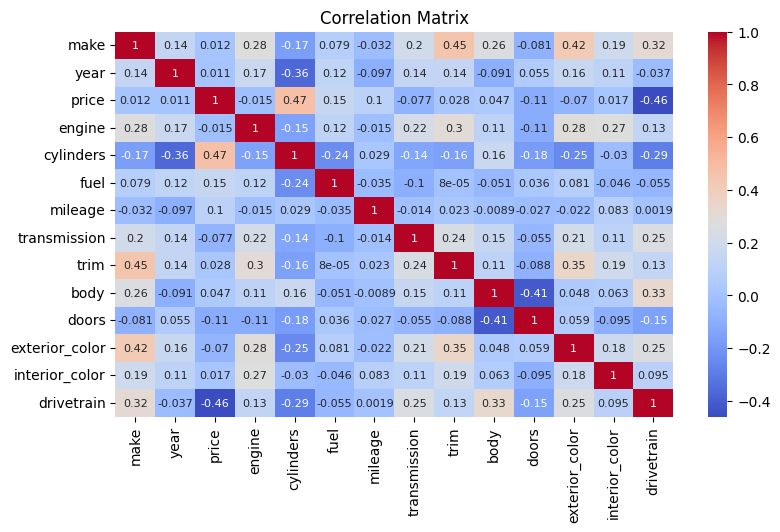

In [127]:
correlation_matrix = df.corr()
plt.figure(figsize=(9, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',annot_kws={'size': 8})
plt.title('Correlation Matrix')
plt.show()

In [128]:
# Select features with high correlation to 'price'
high_corr_features = correlation_matrix['price'].abs().sort_values(ascending=False)
print(high_corr_features)

price             1.000000
cylinders         0.474330
drivetrain        0.459402
fuel              0.154171
doors             0.106840
mileage           0.100730
transmission      0.076938
exterior_color    0.070195
body              0.046979
trim              0.028487
interior_color    0.016822
engine            0.015130
make              0.011923
year              0.011111
Name: price, dtype: float64


In [ ]:
cylinders,fuel,body,trim,make,

In [50]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [129]:
rfr=RandomForestRegressor()

In [130]:
rfe = RFE(rfr, n_features_to_select=8)  # Adjust n_features_to_select as needed

In [131]:
rfe.fit(x, y)

RFE(estimator=RandomForestRegressor(), n_features_to_select=8)

In [132]:
important_features = x.columns[rfe.support_]
print("Selected Features:", important_features)

Selected Features: Index(['make', 'engine', 'cylinders', 'fuel', 'mileage', 'trim',
       'interior_color', 'drivetrain'],
      dtype='object')


# Splitting the Data into train and test data

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [279]:
x=df[['make', 'engine', 'cylinders', 'fuel', 'mileage', 'transmission',
       'trim', 'drivetrain']]


In [280]:
x_train,x_test, y_train,y_test=train_test_split(x,y, test_size=20, random_state=42)

In [273]:
sc=StandardScaler()

In [274]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Training the Model

# Linear Regression Model

In [275]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [138]:
lr=LinearRegression()

In [281]:
lr.fit(x_train,y_train)

LinearRegression()

In [282]:
y_pred=lr.predict(x_test)

In [283]:
r1=r2_score(y_test,y_pred)

In [284]:
print("r2 Score is ",r1)

r2 Score is  0.6555035118697408


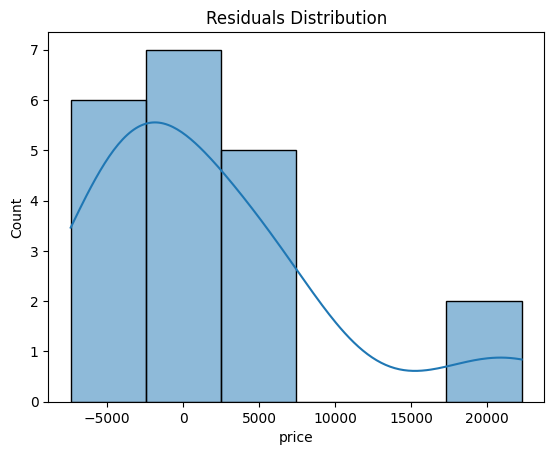

In [285]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

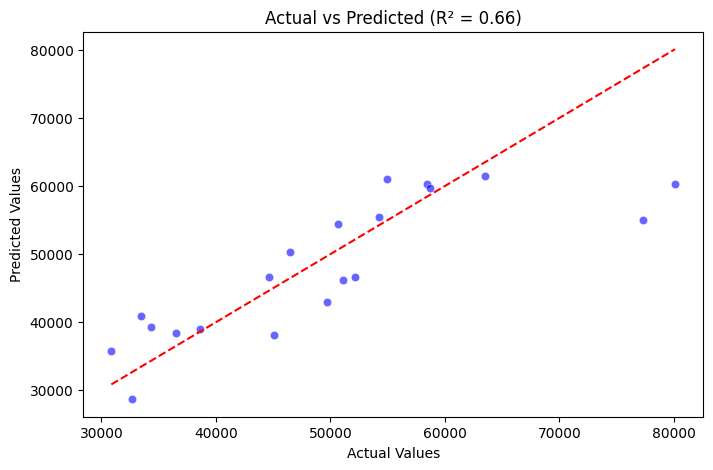

In [286]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted (R² = {r2_score(y_test, y_pred):.2f})')
plt.show()

# Random Forest Regressor

In [143]:
from sklearn.ensemble import RandomForestRegressor

In [144]:
rfr=RandomForestRegressor()

In [287]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [288]:
y_pred=rfr.predict(x_test)

In [289]:
r2=r2_score(y_test,y_pred)

In [290]:
print("r2 score is ",r2)

r2 score is  0.9267768227171613


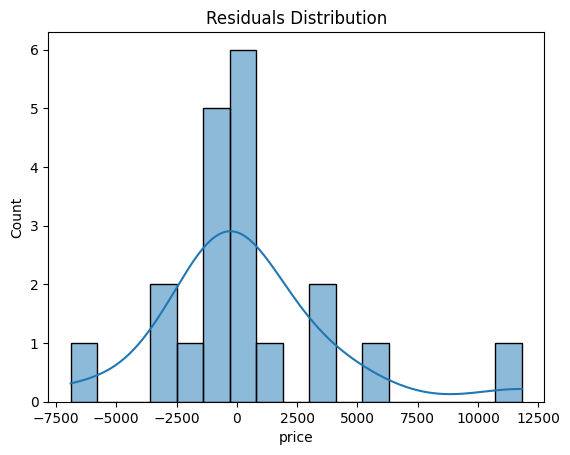

In [291]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

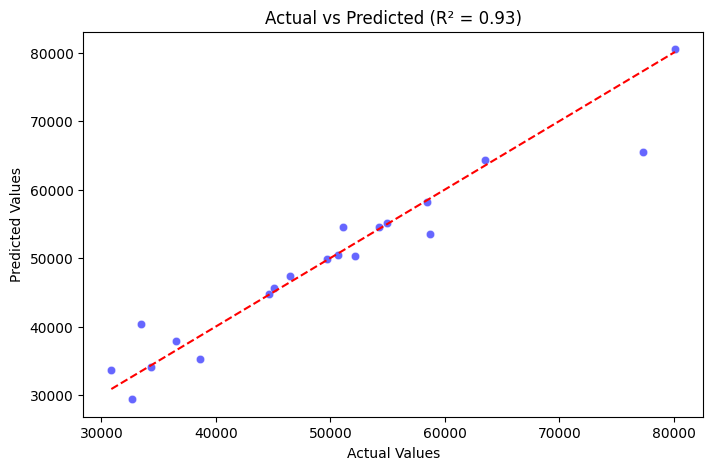

In [292]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted (R² = {r2_score(y_test, y_pred):.2f})')
plt.show()

# Decision Tree Regressor

In [293]:
from sklearn.tree import DecisionTreeRegressor

In [294]:
dtr=DecisionTreeRegressor()

In [295]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [296]:
y_pred=dtr.predict(x_test)

In [298]:
r6=r2_score(y_test,y_pred)

In [299]:
print("r2 Score is ",r6)

r2 Score is  0.9331218213998366


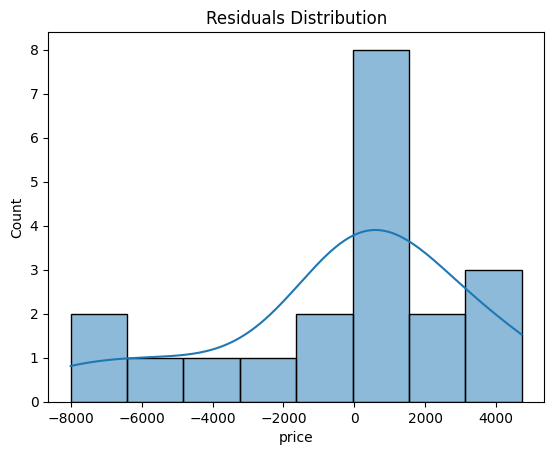

In [300]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

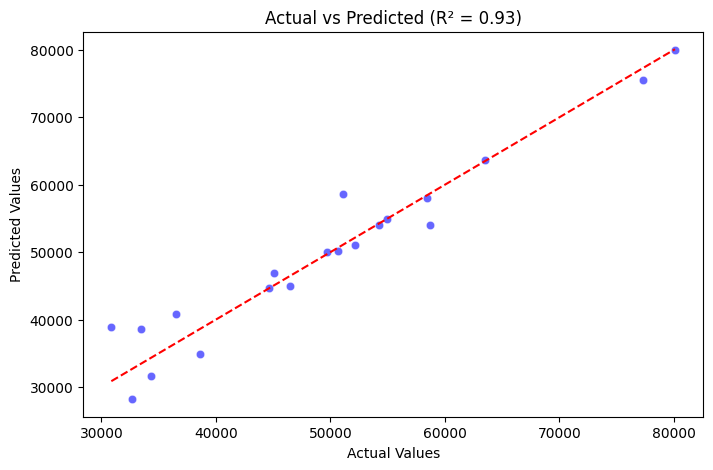

In [301]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted (R² = {r2_score(y_test, y_pred):.2f})')
plt.show()

# Improving Model Performance

# Applying VIF

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [149]:
x=df.drop(columns=['price'])

In [150]:
vif_data=pd.DataFrame()

In [151]:
vif_data['features']=x.columns

In [152]:
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [153]:
print(vif_data)

          features         VIF
0             make    3.482203
1             year  321.234926
2           engine    2.636715
3        cylinders   18.591154
4             fuel    4.089070
5          mileage    1.033693
6     transmission    2.172159
7             trim    3.101618
8             body    4.905769
9            doors  238.113255
10  exterior_color    2.997282
11  interior_color    1.527019
12      drivetrain    6.788310


In [302]:
x=df[['make','year','engine','cylinders','fuel','mileage','transmission','trim','body','doors','exterior_color','interior_color','drivetrain']]

In [303]:
y=df['price']

In [304]:
x_train,x_test, y_train, y_test= train_test_split(x,y, test_size=20, random_state=42)

In [305]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Linear Regression Model

In [306]:
lr.fit(x_train,y_train)

LinearRegression()

In [307]:
y_pred=lr.predict(x_test)

In [308]:
r3=r2_score(y_test,y_pred)

In [309]:
print("r2 Score is ",r3)

r2 Score is  0.5935635056727722


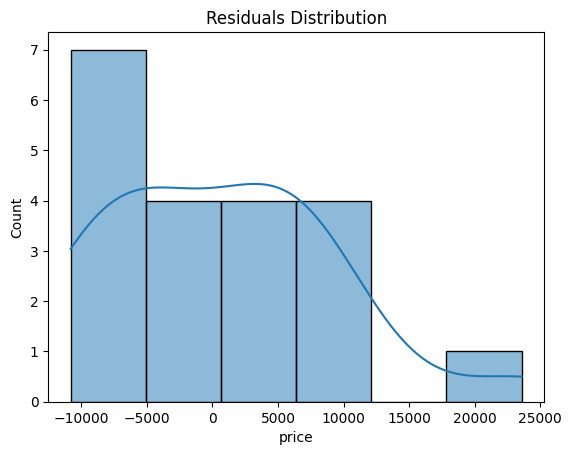

In [310]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

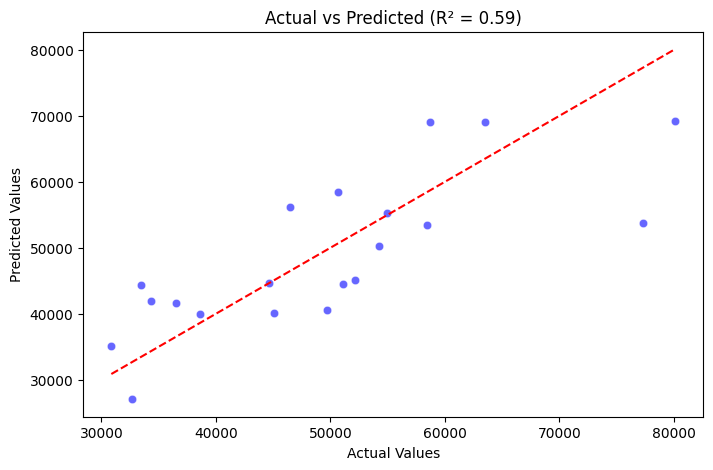

In [311]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted (R² = {r2_score(y_test, y_pred):.2f})')
plt.show()

# Random Forest Regressor Model

In [312]:
rfr=RandomForestRegressor()

In [313]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [314]:
y_pred=rfr.predict(x_test)

In [315]:
r4=r2_score(y_test,y_pred)

In [316]:
print("r2 Score is ",r4)

r2 Score is  0.6859532888662372


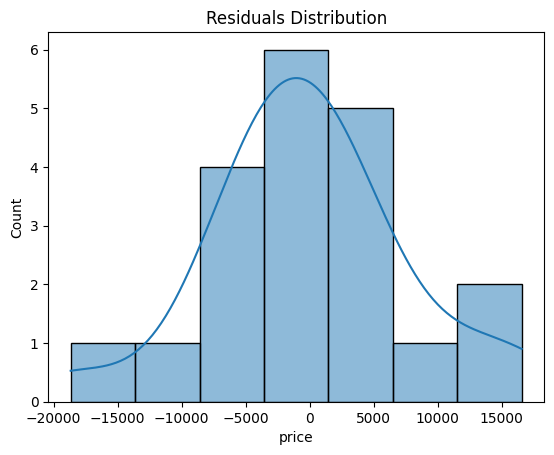

In [317]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

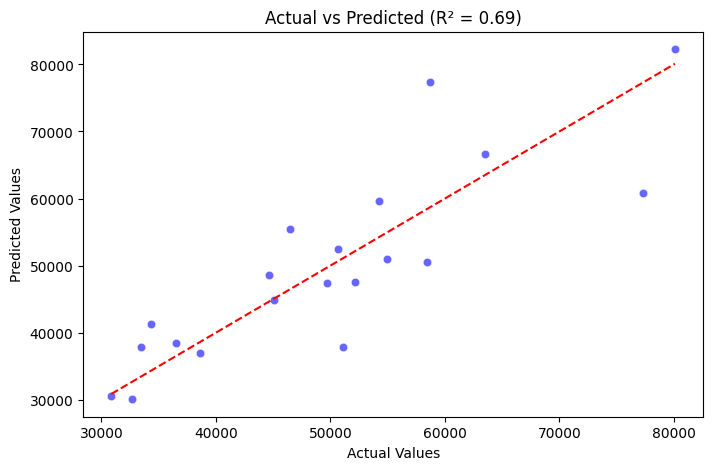

In [318]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted (R² = {r2_score(y_test, y_pred):.2f})')
plt.show()

# Decision Tree Regressor

In [171]:
from sklearn.tree import DecisionTreeRegressor

In [319]:
dtr=DecisionTreeRegressor()

In [320]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [321]:
y_pred=dtr.predict(x_test)

In [322]:
r5=r2_score(y_test,y_pred)

In [323]:
print("r2 Score is ",r5)

r2 Score is  0.7066690730775136


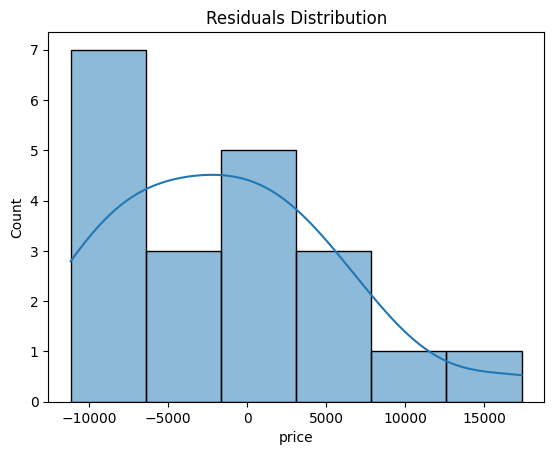

In [324]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

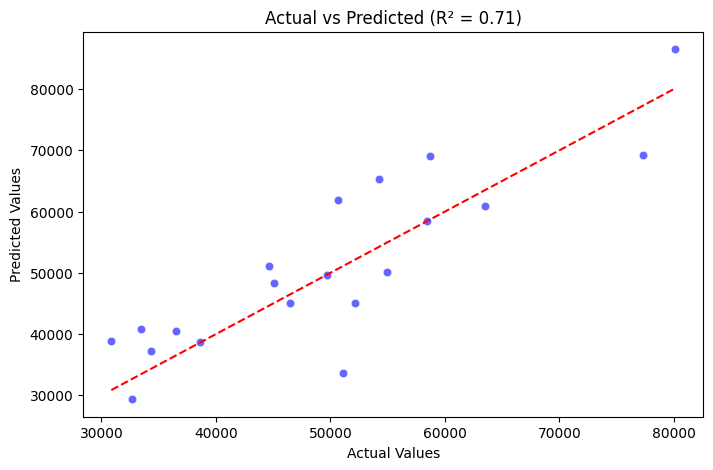

In [325]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted (R² = {r2_score(y_test, y_pred):.2f})')
plt.show()